## Loading required libraries

In [2]:
import pandas as pd
import requests
import io
from matplotlib import pyplot as plt

## Extracting data from github

In [3]:
url = "https://raw.githubusercontent.com/simoneSantoni/data-viz-smm635/master/data/koopAndTobias/koop_tobias.csv"
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))
df.head(5)

,PERSONID,EDUC,LOGWAGE,POTEXPER,TIMETRND,ABILITY,MOTHERED,FATHERED,BRKNHOME,SIBLINGS
0,1,13,1.82,1,0,1.0,12,12,0,1
1,1,18,3.29,3,7,1.0,12,12,0,1
2,1,18,3.21,5,9,1.0,12,12,0,1
3,1,18,3.06,6,10,1.0,12,12,0,1
4,2,15,2.14,4,6,1.5,12,12,0,1


## Data Cleaning

In [4]:
# Getting the average of each variable for each person
df_educ = pd.DataFrame(df.groupby("PERSONID", as_index=False)["EDUC"].aggregate(np.mean))
df_wage = pd.DataFrame(df.groupby("PERSONID", as_index=False)["LOGWAGE"].aggregate(np.mean))
df_abi = pd.DataFrame(df.groupby("PERSONID", as_index=False)["ABILITY"].aggregate(np.mean))
df_mom = pd.DataFrame(df.groupby("PERSONID", as_index=False)["MOTHERED"].aggregate(np.mean))
df_dad = pd.DataFrame(df.groupby("PERSONID", as_index=False)["FATHERED"].aggregate(np.mean))
df_sib = pd.DataFrame(df.groupby("PERSONID", as_index=False)["SIBLINGS "].aggregate(np.mean))

## Creating univariate distributions

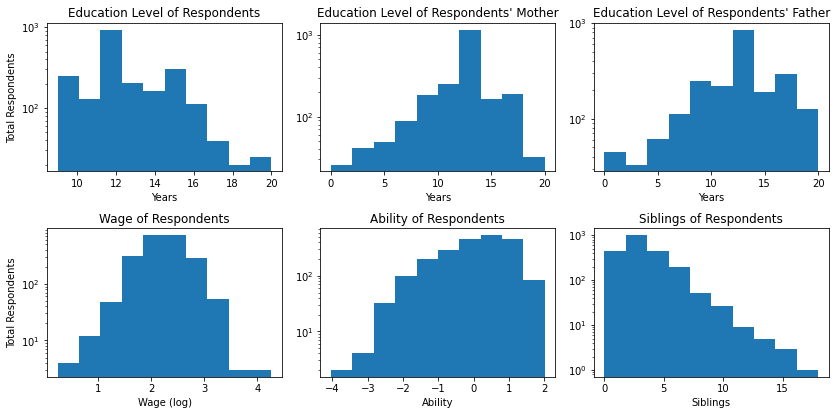

In [9]:
# set the style
plt.style.use('fast')

# create the figure
fig = plt.figure(figsize=(11.69,8.27))

# populate the figure with a plot
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)

# plot
ax1.hist(df_educ["EDUC"], log=True)
ax2.hist(df_mom["MOTHERED"], log=True)
ax3.hist(df_dad["FATHERED"], log=True)
ax4.hist(df_wage["LOGWAGE"], log=True)
ax5.hist(df_abi["ABILITY"], log=True)
ax6.hist(df_sib["SIBLINGS "], log=True)

# axes label
ax1.set_title("Education Level of Respondents")
ax1.set_xlabel('Years')
ax1.set_ylabel('Total Respondents')

ax2.set_title("Education Level of Respondents' Mother")
ax2.set_xlabel('Years')

ax3.set_title("Education Level of Respondents' Father")
ax3.set_xlabel('Years')

ax4.set_title("Wage of Respondents")
ax4.set_xlabel('Wage (log)')
ax4.set_ylabel('Total Respondents')

ax5.set_title("Ability of Respondents")
ax5.set_xlabel('Ability')

ax6.set_title("Siblings of Respondents")
ax6.set_xlabel('Siblings')

# adjusting the spacing between subplots
plt.tight_layout(pad=1.0)

# showing the plot
plt.show()

## Creating bivariate distributions

In [10]:
# forming a new data frame with the 2 variables
df_bi1 = pd.merge(df_educ, df_wage)

# OLS for wage against education
import statsmodels.api as sm
import statsmodels.formula.api as smf

FML = "LOGWAGE ~ EDUC"
OLS = smf.ols(FML, data=df_bi1).fit()

# the predicted value of y for each x
y1_hat = OLS.fittedvalues

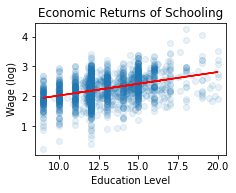

In [13]:
# create the figure
fig = plt.figure(figsize=(11.69,8.27))

# populate the figure with a plot
ax7 = fig.add_subplot(3,3,7)

# data
x1 = df_educ['EDUC']
y1 = df_wage["LOGWAGE"]

# creating the scatter plot
ax7.scatter(x1, y1, alpha=0.1)

# label
ax7.set_xlabel("Education Level")
ax7.set_ylabel("Wage (log)")
ax7.set_title("Economic Returns of Schooling")

# adding a best fit line
ax7.plot(x1,y1_hat, color='red')

plt.show()

In [14]:
# forming a new data frame with the 2 variables
df_bi2 = pd.merge(df_educ, df_dad)

# OLS
FML = "FATHERED ~ EDUC"
OLS = smf.ols(FML, data=df_bi2).fit()

# the predicted value of y for each x
y2_hat = OLS.fittedvalues

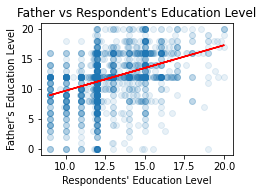

In [15]:
# create the figure
fig = plt.figure(figsize=(11.69,8.27))

# populate the figure with a plot
ax8 = fig.add_subplot(3,3,8)

# data
x2 = df_educ['EDUC']
y2 = df_dad["FATHERED"]

# creating the scatter plot
ax8.scatter(x2, y2, alpha=0.1)

# label
ax8.set_xlabel("Respondents' Education Level")
ax8.set_ylabel("Father's Education Level")
ax8.set_title("Father vs Respondent's Education Level")

# adding a best fit line
ax8.plot(x2,y2_hat, color='red')

plt.show()

In [16]:
# forming a new data frame with the 2 variables
df_bi3 = pd.merge(df_abi, df_educ)
df_bi3.head()

# OLS
FML = "ABILITY ~ EDUC"
OLS = smf.ols(FML, data=df_bi3).fit()

# the predicted value of y for each x
y3_hat = OLS.fittedvalues

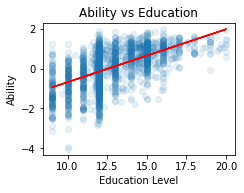

In [17]:
# create the figure
fig = plt.figure(figsize=(11.69,8.27))

# populate the figure with a plot
ax9 = fig.add_subplot(3,3,9)

# data
x3 = df_educ['EDUC']
y3 = df_abi["ABILITY"]

# creating the scatter plot
ax9.scatter(x3, y3, alpha=0.1)

# label
ax9.set_xlabel("Education Level")
ax9.set_ylabel("Ability")
ax9.set_title("Ability vs Education")

# adding a best fit line
ax9.plot(x3,y3_hat, color='red')

plt.show()

## Combining both Uni and Bi-variate distributions

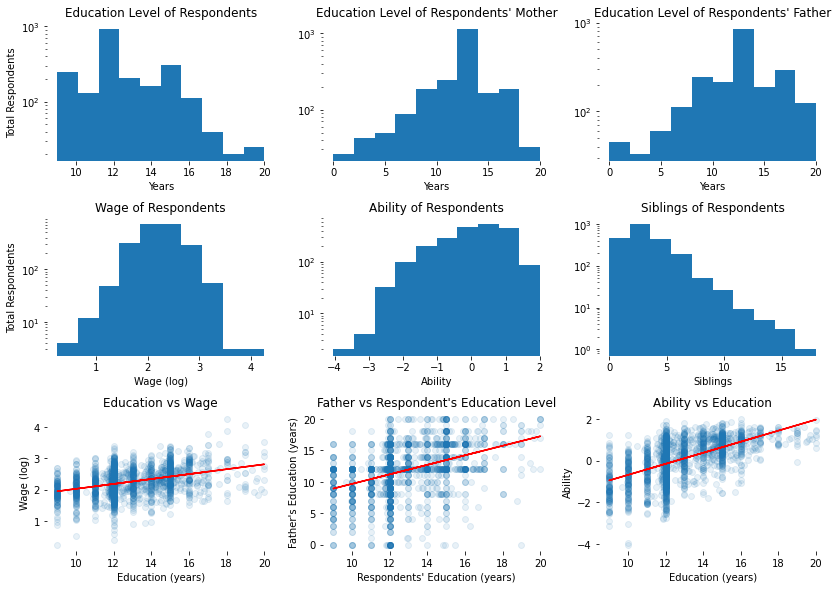

In [19]:
# set the style
plt.style.use('fast')

# create the figure
fig = plt.figure(figsize=(11.69,8.27))

# populate the figure with a plot
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)
ax7 = fig.add_subplot(3,3,7)
ax8 = fig.add_subplot(3,3,8)
ax9 = fig.add_subplot(3,3,9)

# plot
ax1.hist(df_educ["EDUC"], log=True)
ax2.hist(df_mom["MOTHERED"], log=True)
ax3.hist(df_dad["FATHERED"], log=True)
ax4.hist(df_wage["LOGWAGE"], log=True)
ax5.hist(df_abi["ABILITY"], log=True)
ax6.hist(df_sib["SIBLINGS "], log=True)
ax7.scatter(x1, y1, alpha=0.1)
ax8.scatter(x2, y2, alpha=0.1)
ax9.scatter(x3, y3, alpha=0.1)

# axes label
ax1.set_title("Education Level of Respondents")
ax1.set_xlabel('Years')
ax1.set_ylabel('Total Respondents')

ax2.set_title("Education Level of Respondents' Mother")
ax2.set_xlabel('Years')

ax3.set_title("Education Level of Respondents' Father")
ax3.set_xlabel('Years')

ax4.set_title("Wage of Respondents")
ax4.set_xlabel('Wage (log)')
ax4.set_ylabel('Total Respondents')

ax5.set_title("Ability of Respondents")
ax5.set_xlabel('Ability')

ax6.set_title("Siblings of Respondents")
ax6.set_xlabel('Siblings')

ax7.set_xlabel("Education (years)")
ax7.set_ylabel("Wage (log)")
ax7.set_title("Education vs Wage")

ax8.set_xlabel("Respondents' Education (years)")
ax8.set_ylabel("Father's Education (years)")
ax8.set_title("Father vs Respondent's Education Level")

ax9.set_xlabel("Education (years)")
ax9.set_ylabel("Ability")
ax9.set_title("Ability vs Education")

# adding a best fit line
ax7.plot(x1,y1_hat, color='red')
ax8.plot(x2,y2_hat, color='red')
ax9.plot(x3,y3_hat, color='red')

# removing the spines
graphs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
for i in range(0,9):
    graphs[i].spines['right'].set_visible(False)
    graphs[i].spines['left'].set_visible(False)
    graphs[i].spines['bottom'].set_visible(False)
    graphs[i].spines['top'].set_visible(False)

# adjusting the spacing between subplots
plt.tight_layout(pad=1)

# showing the plot
plt.show()